In [436]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_test_results(env_name, write_out=False, plot_avg=False):
    if write_out:
            print("============================================================================================")

    fig_num = 0     #### change this to prevent overwriting figures in same env_name folder

    fig_width = 10
    fig_height = 5


    # smooth out rewards to get a smooth and a less smooth (var) plot lines
    window_len_smooth = 50
    min_window_len_smooth = 1
    linewidth_smooth = 1.5
    alpha_smooth = 1

    window_len_var = 5
    min_window_len_var = 1
    linewidth_var = 2
    alpha_var = 0.1


    colors = ['red', 'blue', 'green', 'orange', 'purple', 'olive', 'brown', 'magenta', 'cyan', 'crimson','gray', 'black']


    # make directory for saving figures
    figures_dir = "PPO_figs"
    if not os.path.exists(figures_dir):
        os.makedirs(figures_dir)

    # make environment directory for saving figures
    figures_dir = figures_dir + '/' + env_name + '/'
    if not os.path.exists(figures_dir):
        os.makedirs(figures_dir)


    fig_save_path = figures_dir + '/PPO_' + env_name + '_fig_' + str(fig_num) + '.png'


    # get number of log files in directory
    log_dir = "PPO_logs" + '/' + env_name + '/'

    current_num_files = next(os.walk(log_dir))[2]
    num_runs = len(current_num_files)


    all_runs = []

    for run_num in range(num_runs-1,num_runs):

        log_f_name = log_dir + '/PPO_' + env_name + "_log_" + str(run_num) + ".csv"
        if write_out:
            print("loading data from : " + log_f_name)
        data = pd.read_csv(log_f_name, on_bad_lines='skip')
        data = pd.DataFrame(data)


        # r = np.array(data['reward'])
        # if r[-1]>9000:
        #     print(np.array(data['eps_clip'])[0], np.array(data['lr_actor'])[0], np.array(data['lr_critic'])[0],r[-1])
        #     all_runs.append(data)

        if write_out:
            print("data shape : ", data.shape)
        
        all_runs.append(data)
        if write_out:
            print("--------------------------------------------------------------------------------------------")


    ax = plt.gca()

    if plot_avg:
        # average all runs
        df_concat = pd.concat(all_runs)
        df_concat_groupby = df_concat.groupby(df_concat.index)
        data_avg = df_concat_groupby.mean()

        # smooth out rewards to get a smooth and a less smooth (var) plot lines
        data_avg['reward_smooth'] = data_avg['reward'].rolling(window=window_len_smooth, win_type='triang', min_periods=min_window_len_smooth).mean()
        data_avg['reward_var'] = data_avg['reward'].rolling(window=window_len_var, win_type='triang', min_periods=min_window_len_var).mean()

        data_avg.plot(kind='line', x='timestep' , y='reward_smooth',ax=ax,color=colors[0],  linewidth=linewidth_smooth, alpha=alpha_smooth)
        data_avg.plot(kind='line', x='timestep' , y='reward_var',ax=ax,color=colors[0],  linewidth=linewidth_var, alpha=alpha_var)

        # keep only reward_smooth in the legend and rename it
        handles, labels = ax.get_legend_handles_labels()
        ax.legend([handles[0]], ["reward_avg_" + str(len(all_runs)) + "_runs"], loc=2)


    else:
        for i, run in enumerate(all_runs):
            # smooth out rewards to get a smooth and a less smooth (var) plot lines
            run['reward_smooth_' + str(i)] = run['reward'].rolling(window=window_len_smooth, win_type='triang', min_periods=min_window_len_smooth).mean()
            run['reward_var_' + str(i)] = run['reward'].rolling(window=window_len_var, win_type='triang', min_periods=min_window_len_var).mean()
            
            # plot the lines
            run.plot(kind='line', x='timestep' , y='reward_smooth_' + str(i),ax=ax,color=colors[i % len(colors)],  linewidth=linewidth_smooth, alpha=alpha_smooth)
            run.plot(kind='line', x='timestep' , y='reward_var_' + str(i),ax=ax,color=colors[i % len(colors)],  linewidth=linewidth_var, alpha=alpha_var)

        # keep alternate elements (reward_smooth_i) in the legend
        handles, labels = ax.get_legend_handles_labels()
        new_handles = []
        new_labels = []
        for i in range(len(handles)):
            if(i%2 == 0):
                new_handles.append(handles[i])
                new_labels.append(labels[i])
        ax.legend(new_handles, new_labels, loc=2)



    # ax.set_yticks(np.arange(0, 13000, 1000))
    # ax.set_xticks(np.arange(0, int(4e6), int(2e5)))


    ax.grid(color='gray', linestyle='-', linewidth=1, alpha=0.2)

    # plot max reward line
    ax.plot(np.arange(int(2e6)),400*np.ones((int(2e6),)),'k--')
    # ax.set_facecolor([0.0,0.0,0.5,0.05])

    ax.set_xlabel("Timesteps", fontsize=12)
    ax.set_ylabel("Rewards", fontsize=12)

    ax.set_ylim([0,350])
    ax.set_xlim([0,2e5])

    plt.title(env_name, fontsize=14)


    fig = plt.gcf()
    fig.set_size_inches(fig_width, fig_height)

    print("============================================================================================")

    plt.savefig(fig_save_path)
    print("figure saved at : ", fig_save_path)

    print("============================================================================================")


    plt.show()

    return

figure saved at :  PPO_figs/Drone//PPO_Drone_fig_0.png


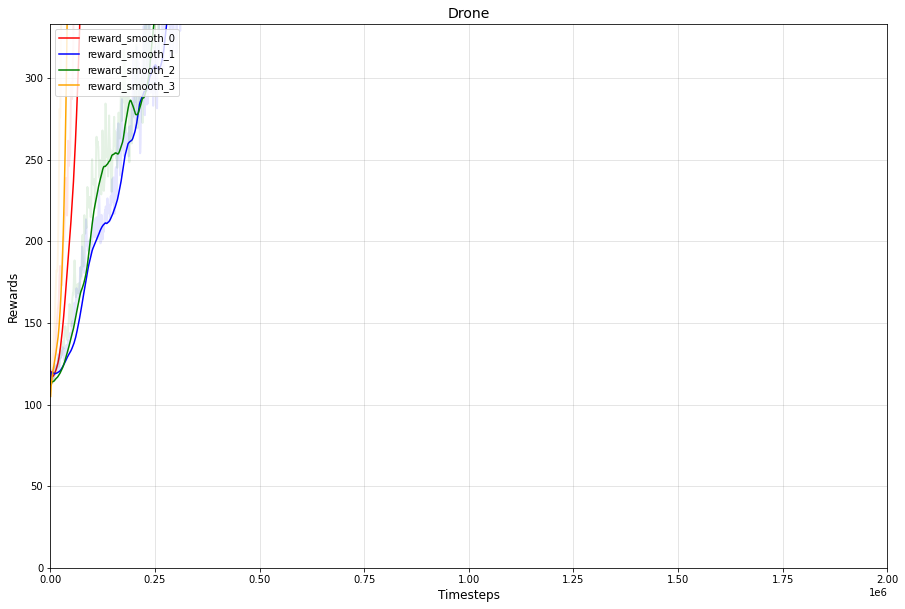

In [404]:
plot_test_results(env_name='Drone',plot_avg=False)

In [ ]:
plot_test_results(env_name='CartPole-v1',plot_avg=False)